(visualization-examples)=
# Advanced Visualization

In this notebook we will explore how to improve the quality of our `matplotlib` plots in order to effectively and convincingly conveying the information that they contain. Once you are familiar with the terminology related to Python lots (e.g., axes, subplots, etc), it will also be very easy to search for help online: matplotlib has [nearly 200,000 search results on Stack Exchange!](https://stackexchange.com/search?q=matplotlib).

If you are not comfortable making basic plots using Python, we strongly recommend you spend some time studying and practicing the Matplotlib chapter of the online course Python for Engineers (both [Theory](https://tudelft-citg.github.io/learn-python/07/Theory/01.html#) and [In a Nutshell](https://tudelft-citg.github.io/learn-python/07/In_a_Nutshell/01.html#) pages).

On this page We will use a dataset on *water quality* of different rivers in India, made available [here](https://www.kaggle.com/datasets/utcarshagrawal/water-quality-data) on Kaggle. The dataset contains several water quality indicator including pH, dissolved oxygen, conductivity, and so on. For the purpose of this walkthrough, you do not need any in-depth knowledge on water quality. Feel free to check more information on the dataset on the original webpage.

```{admonition} Don't see what you need here?
Search on our [Answers platform](https://answers.citg.tudelft.nl/), and ask a question if you can't find it! If it's useful for your MUDE assignments we will also incorporate it into this page.
```

```{admonition} MUDE Project Information
Once this page has has been covered in a MUDE Programming Assignment you are expected to refer to this material often throughout MUDE, especially to improve the quality of your Project reports; this is part of the Documentation assessment category.
```

In [40]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

Now that our packages are imported, the following cell uses a pandas dataframe to:
* import a dataset,
* removes any NaN's that may be present,
* changes column names and 
* visualizes a small portion of the dataset.

In [41]:
df = pd.read_csv( './waterquality_rivers_india.csv', usecols = [0,2,3,4,5,6,7,10], encoding= 'unicode_escape')
df = df.dropna(axis=0)
df.columns = ['station_ID', 'state', 'Temp', 'DO', 'pH', 'Conduct', 'BOD', 'TOTAL_COLIFORM']
df.head()

,station_ID,state,Temp,DO,pH,Conduct,BOD,TOTAL_COLIFORM
0,1312,MAHARASHTRA,29.2,6.4,8.1,735.0,3.4,73.0
1,2177,MAHARASHTRA,24.5,6.0,8.0,270.0,3.1,182.0
2,2182,MAHARASHTRA,25.8,5.5,7.8,355.0,4.2,133.0
3,2179,MAHARASHTRA,24.8,5.5,7.8,371.0,5.6,283.0
4,2183,MAHARASHTRA,25.7,5.7,7.9,294.0,3.2,132.0


Let's start by creating a simple scatterplot of the variables *temperature* and *pH* using `pandas` functionalities.

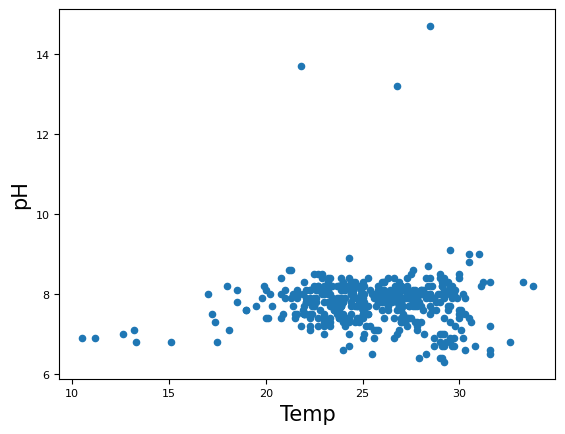

In [42]:
df.plot.scatter(x='Temp', y='pH');

While we can make use of the plot above for some analysis, we should strive to generate readable and high-quality plots, which are crucial for clear communication.

**How can we improve the plot above?**

We can use `matplotlib` and all the room for customization it provides, given that `pandas` plots are `matplolib` plots! Indeed, you could have created the (almost) the same plot by typing `plt.scatter(df['Temp'], df['pH'])` instead. In the following notebook, we will use both ways interchangeably to explore some key considerations concerning different aspects of `matplotlib` plots that we can improve.

```{note}
For the purpose of this notebook, we will not strictly adhere to the *Golden Rules* (especially Rule 4: write simple functions and use them) by retyping code that could have been reused.
```

## Outside the Box: Axes and Lines

This section focuses on formatting the axes, axes labels and adding gridlines: think of it like crafting the picture frame for the points and lines that you will be adding to create the snapshot of your analysis.

### Descriptive title and axes labels.

Let's start by recreating the original plot, storing it in a variable, and modifying its appearance by i) providing a clear and descriptive title, and ii) renaming the axes. Clear titles and axes labels provide context and scale, enabling viewers to quickly understand the data's significance and dimensions. Without them, the information becomes ambiguous, potentially leading to misinterpretation. Remember from your chemistry lessons that pH variable has no unit.

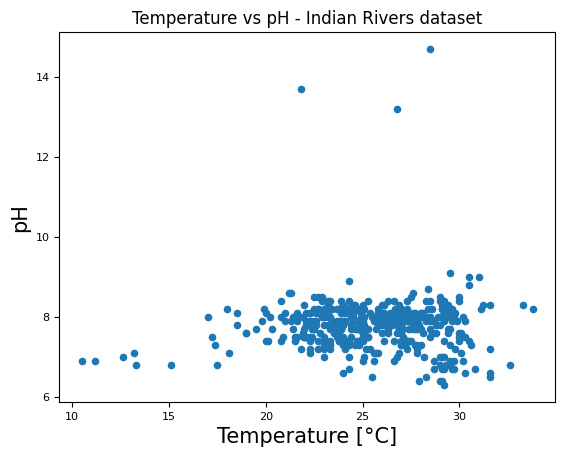

In [43]:
ax = df.plot.scatter(x='Temp', y='pH')

ax.set_xlabel('Temperature [°C]')
ax.set_ylabel('pH')
ax.set_title('Temperature vs pH - Indian Rivers dataset');

:::{admonition} Using `plt.subplots()`---Why?
In the following examples, we will use the `plt.subplots()` command even if we create a single *axes*, that is an object with plotting methods. [This is a common practice](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html) for several reasons, mainly because: i) it provides direct control over both figure and axes, 2) it offers flexibility for future visualization expansions, 3) it ensures consistent code for single and multiple plots, and 4) it aligns with Matplotlib's object-oriented approach.
:::

### Range limits, axis scale and axis spines

You want to set appropriate axes limits to focus on the most relevant parts of your data, visually removing outliers or noise if necessary. Also, depending on the data distribution, choose an appropriate scale (linear, logarithmic, etc.). For instance, logarithmic scales can be helpful for datasets that span several orders of magnitude. Also, consider making only the left and bottom spines visible for a cleaner look.

Below you see some original plots created with our datasets (left) and their modified version (right) concerning *range limitation*, ...

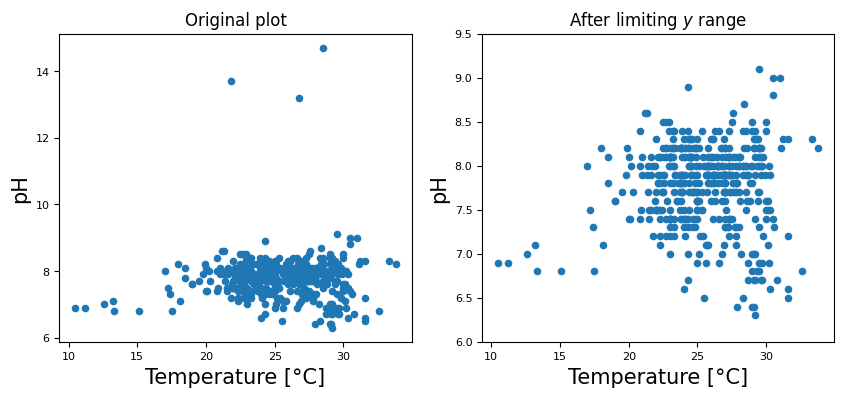

In [44]:
fig, axes = plt.subplots(1,2,figsize = (10,4))

df.plot.scatter(x='Temp', y='pH', ax = axes[0])
axes[0].set_xlabel('Temperature [°C]')
axes[0].set_ylabel('pH')
axes[0].set_title('Original plot');

df.plot.scatter(x='Temp', y='pH', ax = axes[1])
axes[1].set_xlabel('Temperature [°C]')
axes[1].set_ylabel('pH')
axes[1].set_ylim([6,9.5])
axes[1].set_title(r'After limiting $y$ range');

... *scaling* ...

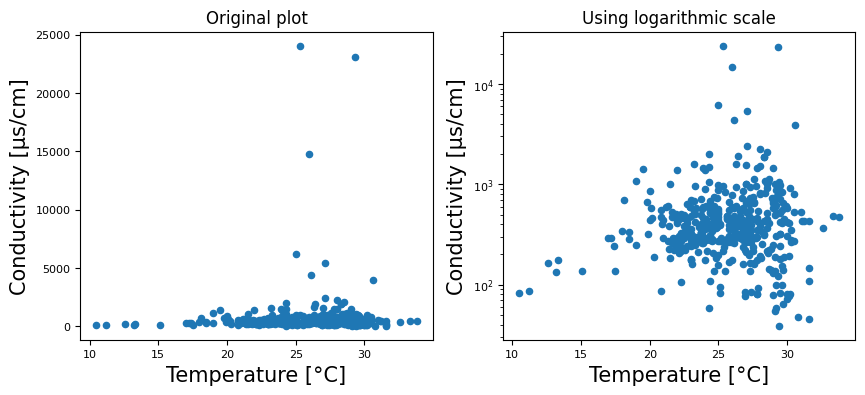

In [45]:
fig, axes = plt.subplots(1,2,figsize = (10,4))

df.plot.scatter(x='Temp', y='Conduct', ax = axes[0])
axes[0].set_xlabel('Temperature [°C]')
axes[0].set_ylabel('Conductivity [µs/cm]')
axes[0].set_title('Original plot');

df.plot.scatter(x='Temp', y='Conduct', ax = axes[1])
axes[1].set_xlabel('Temperature [°C]')
axes[1].set_ylabel('Conductivity [µs/cm]')
axes[1].set_title('Using logarithmic scale');
axes[1].set_yscale('log')

... and removing unnecessary *spines*

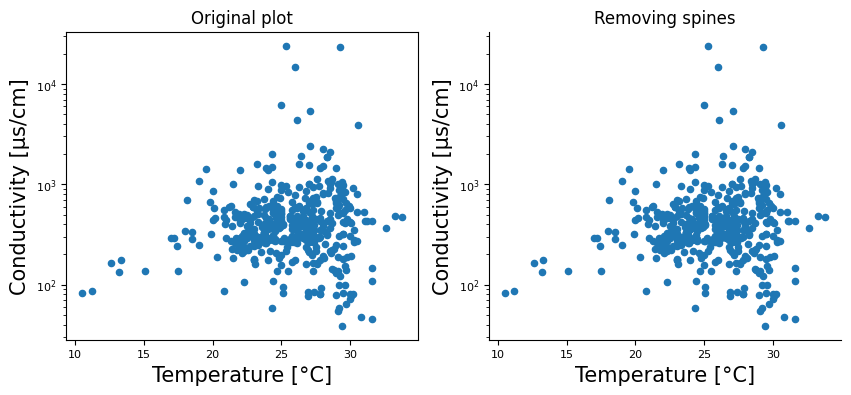

In [46]:
fig, axes = plt.subplots(1,2,figsize = (10,4))

df.plot.scatter(x='Temp', y='Conduct', ax = axes[0])
axes[0].set_xlabel('Temperature [°C]')
axes[0].set_ylabel('Conductivity [µs/cm]')
axes[0].set_yscale('log')
axes[0].set_title('Original plot');

df.plot.scatter(x='Temp', y='Conduct', ax = axes[1])
axes[1].set_xlabel('Temperature [°C]')
axes[1].set_ylabel('Conductivity [µs/cm]')
axes[1].set_title('Removing spines');
axes[1].set_yscale('log')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)


### Tickmarks and ticklabels

Proper *tickmarks* and related labels may help precise data interpretation. Major tickmarks provide the main reference points, while minor tickmarks offer finer detail between those points (check the `y` axis of the logarithmic plots, which contains minor ticks by default).

`matplotlib` uses a combination of algorithms and heuristics to automatically determine appropriate tick positions and labels for the axes of a plot. However, sometimes you might prefer to customize this step, as shown in the example below.

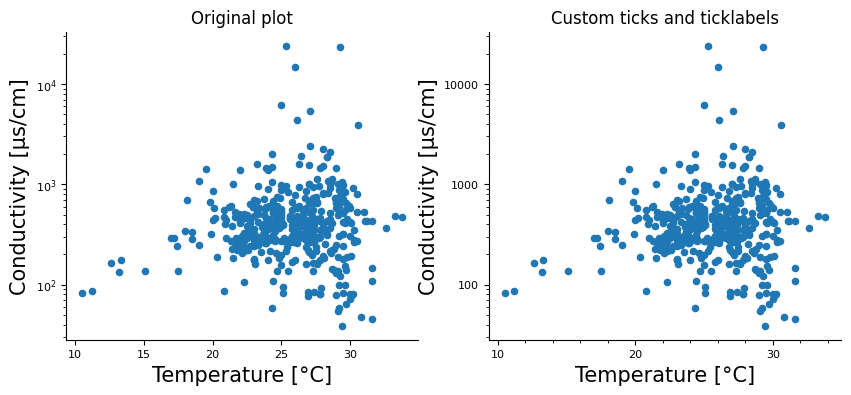

In [47]:
fig, axes = plt.subplots(1,2,figsize = (10,4))

df.plot.scatter(x='Temp', y='Conduct', ax = axes[0])
axes[0].set_xlabel('Temperature [°C]')
axes[0].set_ylabel('Conductivity [µs/cm]')
axes[0].set_yscale('log')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].set_title('Original plot');

df.plot.scatter(x='Temp', y='Conduct', ax = axes[1])
axes[1].set_xlabel('Temperature [°C]')
axes[1].set_ylabel('Conductivity [µs/cm]')
axes[1].set_yscale('log')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set_xticks(np.arange(10,35,10)) # Use only 3 major ticks for the x axis
axes[1].set_yticks([100,1000,10000])
axes[1].set_yticklabels([100,1000,10000]) # Change tick labeling of the y axis
axes[1].minorticks_on() # Turning minor ticks on both axes
axes[1].set_title('Custom ticks and ticklabels');

### Gridlines

*Gridlines* may enhance readability by providing visual reference points across the plot. They can be applied regardless of the axis scale. You can customize several aspects of the grid, including the ticks to use to draws the lines, the linestyle, linewidth, or color. Be aware that using overly dominant gridlines can distract from the data! Try it yourselft by changing the relevant parameters in the modified plot below.

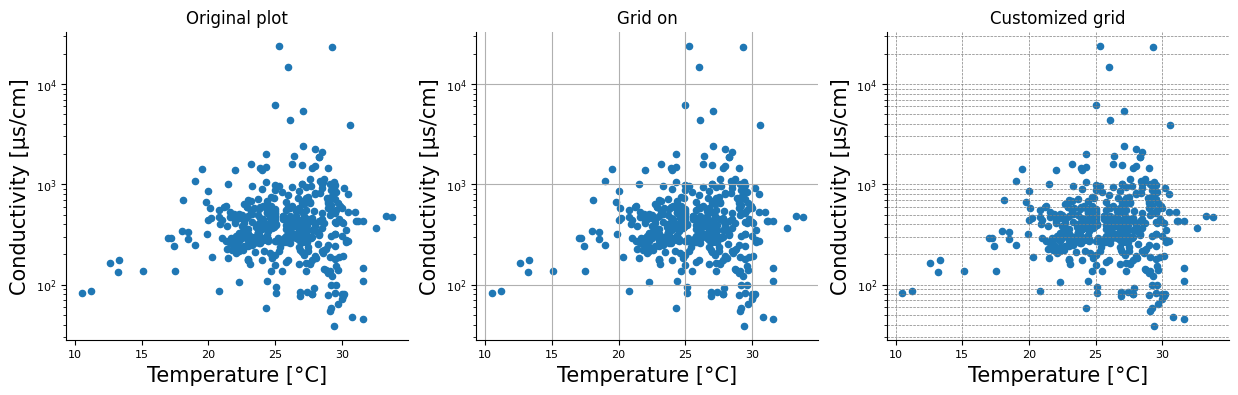

In [48]:
fig, axes = plt.subplots(1,3,figsize = (15,4))

df.plot.scatter(x='Temp', y='Conduct', ax = axes[0])
axes[0].set_xlabel('Temperature [°C]')
axes[0].set_ylabel('Conductivity [µs/cm]')
axes[0].set_yscale('log')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].set_title('Original plot');

df.plot.scatter(x='Temp', y='Conduct', ax = axes[1])
axes[1].set_xlabel('Temperature [°C]')
axes[1].set_ylabel('Conductivity [µs/cm]')
axes[1].set_yscale('log')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set_title('Grid on');
axes[1].grid()

df.plot.scatter(x='Temp', y='Conduct', ax = axes[2])
axes[2].set_xlabel('Temperature [°C]')
axes[2].set_ylabel('Conductivity [µs/cm]')
axes[2].set_yscale('log')
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[2].set_title(r'Modified plot');
axes[2].grid(which='both', linestyle='--', linewidth=0.5, color='gray')
axes[2].set_title('Customized grid');


## Colors+: Make Your Points Pop!

### The `alpha` parameter

The `alpha` parameter in visualizations refers to the opacity level of graphical elements. It can range from 0 (completely transparent) to 1 (completely opaque). Using the `alpha` parameter effectively can greatly enhance visualizations, especially when having dense plots with many overlapping data points.

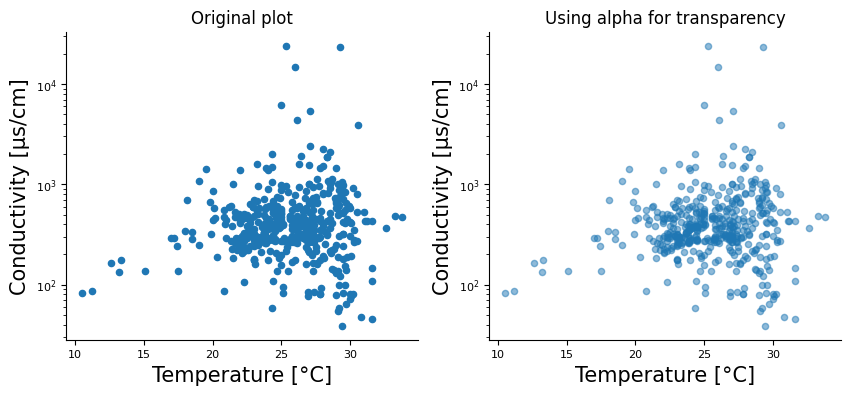

In [49]:
fig, axes = plt.subplots(1,2,figsize = (10,4))

df.plot.scatter(x='Temp', y='Conduct', ax = axes[0])
axes[0].set_xlabel('Temperature [°C]')
axes[0].set_ylabel('Conductivity [µs/cm]')
axes[0].set_yscale('log')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].set_title('Original plot');

df.plot.scatter(x='Temp', y='Conduct', ax = axes[1], alpha=0.5)
axes[1].set_xlabel('Temperature [°C]')
axes[1].set_ylabel('Conductivity [µs/cm]')
axes[1].set_yscale('log')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set_title('Using alpha for transparency');

### Markers, colors and legends

Markers and colors play a crucial role in scatter plots and similar visualizations. They allow for *categorical differentiation*, where different markers/colors can represent different categories or groups within a dataset. They also enhanche clarity in overlapping data points and may enable intuitive representation, e.g. by assigning suitable markers or colors to represent certain categories (e.g., using red for data points above alarm tresholds).

In general, adding markers and colors allows us to analyse data in multiple dimensions. These extra dimensions must be discrete/categorical for markers, but, as we will see later, they can also be continuous for colors when using colorscales.

Note that when we start adding these dimensions, we need to include a *legend* in the scatter plot. The legend helps viewers understand the representation of markers, acting as a visual guide and ensureing effective documentation of the plot. We can use `matplotlib` *label* parameter and `plt.legend()` to implement the legend seamlessly.

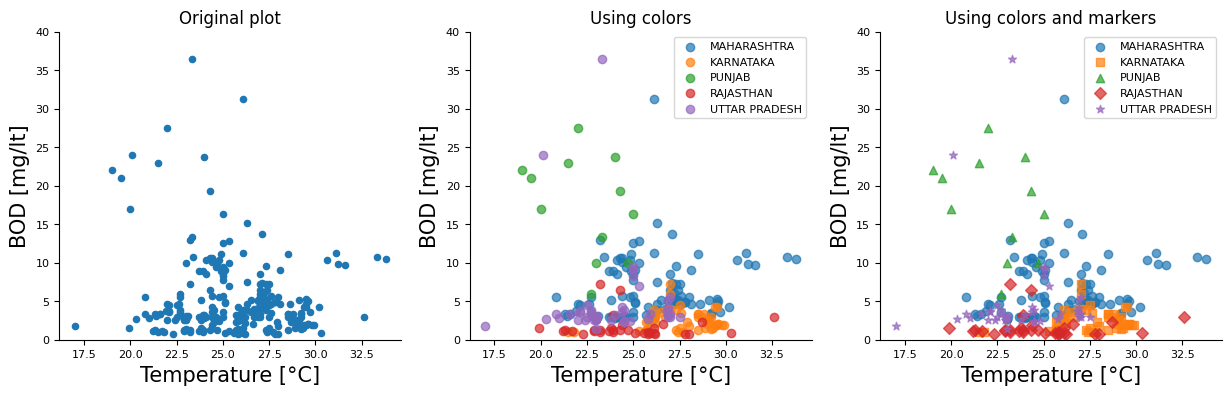

In [50]:
fig, axes = plt.subplots(1,3,figsize = (15,4))

selected_states = ['MAHARASHTRA','KARNATAKA','PUNJAB','RAJASTHAN','UTTAR PRADESH']

df[df['state'].isin(selected_states)].plot.scatter(x='Temp', y='BOD', ax = axes[0])
axes[0].set_xlabel('Temperature [°C]')
axes[0].set_ylabel('BOD [mg/lt]')
axes[0].set_ylim([0,40])
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].set_title('Original plot');


# only colors
for state in selected_states:
    df_state = df[df['state'] == state]
    axes[1].scatter(df_state['Temp'], df_state['BOD'], label=state, alpha=0.7)
# Matplotlib automatically assigns different colors to each state because the scatter() function
#   iterates through the loop for each selected state.
# The label parameter ensures that each state's data points are labeled correctly in the legend.

axes[1].set_xlabel('Temperature [°C]')
axes[1].set_ylabel('BOD [mg/lt]')
axes[1].set_ylim([0,40])
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set_title('Using colors');
axes[1].legend();


## colors and markers
markers = ['o', 's', '^', 'D', '*']

for state, marker in zip(selected_states, markers):
    df_state = df[df['state'] == state]
    axes[2].scatter(df_state['Temp'], df_state['BOD'], marker=marker, label=state, alpha=0.7)

axes[2].set_xlabel('Temperature [°C]')
axes[2].set_ylabel('BOD [mg/lt]')
axes[2].set_ylim([0,40])
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[2].set_title('Using colors and markers');
axes[2].legend();

Note how `matplotlib` combines colors and markers in the legend by associating each state with both a specific color and a marker style in the `scatter()` function.

`matplotlib` aims to automatically position legends optimally, but this isn't always successful. Adjusting the legend's position using the `loc` parameter may enhance the plot's appearance and clarity. It prevents obstructions of data points, avoids overlap with other elements, and ultimately ensures effective communication of the visualized information.

If needed, we can locate the legend "outside" of the axes by using the `bbox_to_anchor` parameter, using a box as an anchor reference. The `bbox_to_anchor` parameter allows you to specify the coordinates of the anchor point, in combination with the `loc` parameter which specifies the corner of the legend box that should align with the anchor point. This approach provides precise control over the positioning of the legend. More information is available in the [matplotlib](https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html) guide.


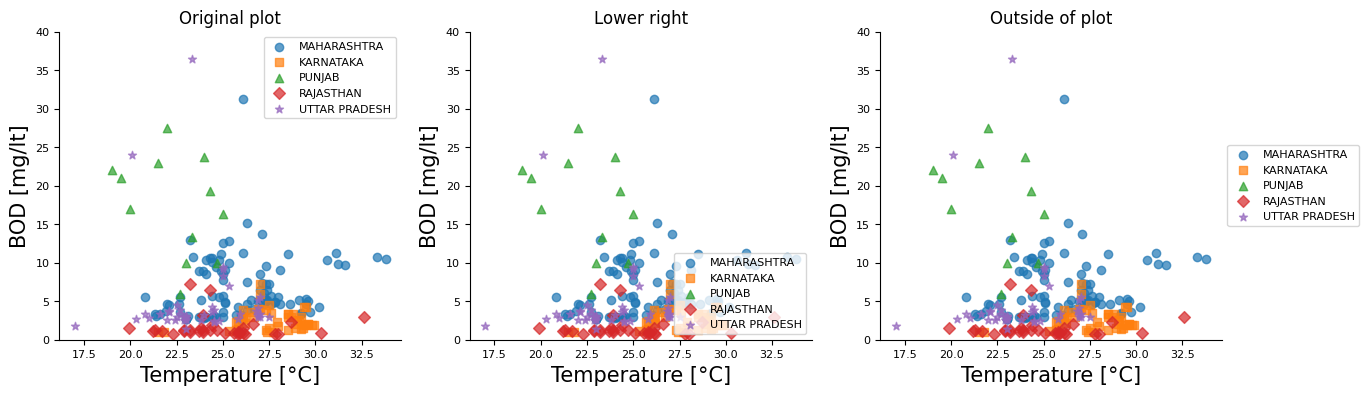

In [51]:
fig, axes = plt.subplots(1,3,figsize = (15,4))

selected_states = ['MAHARASHTRA','KARNATAKA','PUNJAB','RAJASTHAN','UTTAR PRADESH']
markers = ['o', 's', '^', 'D', '*']

for state, marker in zip(selected_states, markers):
    df_state = df[df['state'] == state]
    axes[0].scatter(df_state['Temp'], df_state['BOD'], marker=marker, label=state, alpha=0.7)

axes[0].set_xlabel('Temperature [°C]')
axes[0].set_ylabel('BOD [mg/lt]')
axes[0].set_ylim([0,40])
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].set_title('Original plot');
axes[0].legend();


for state, marker in zip(selected_states, markers):
    df_state = df[df['state'] == state]
    axes[1].scatter(df_state['Temp'], df_state['BOD'], marker=marker, label=state, alpha=0.7)

axes[1].set_xlabel('Temperature [°C]')
axes[1].set_ylabel('BOD [mg/lt]')
axes[1].set_ylim([0,40])
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set_title('Lower right');
axes[1].legend(loc='lower right');

for state, marker in zip(selected_states, markers):
    df_state = df[df['state'] == state]
    axes[2].scatter(df_state['Temp'], df_state['BOD'], marker=marker, label=state, alpha=0.7)

axes[2].set_xlabel('Temperature [°C]')
axes[2].set_ylabel('BOD [mg/lt]')
axes[2].set_ylim([0,40])
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[2].set_title('Outside of plot');
axes[2].legend(loc='center left', bbox_to_anchor=(1, 0.5));

### Friendly colors for color blindness: categorical palettes.

Many people around the world have some form of color blindness. By using appropriate colors, we make content accessible to a wider audience. Some color palettes are specifically designed to be distinguishable by those with color vision deficiencies. Using these friendly palettes can make visuals more accessible. There are online tools and software that can simulate how visuals appear to those with different types of color blindness. By testing visuals with these tools, one can ensure their content is accessible.

Below you see how we can use a color-blind friendly palette taken from [here](https://personal.sron.nl/~pault/) instead pof the standard palette use by `matplotlib`. Several other examples are available. As an exercise, use the free online tool [Coblis](https://www.color-blindness.com/coblis-color-blindness-simulator/) to compare how the two plots would be seen by people with suffering from different color vision deficiencies. Check later in the notebook for a related example on visualizing continuous data.  



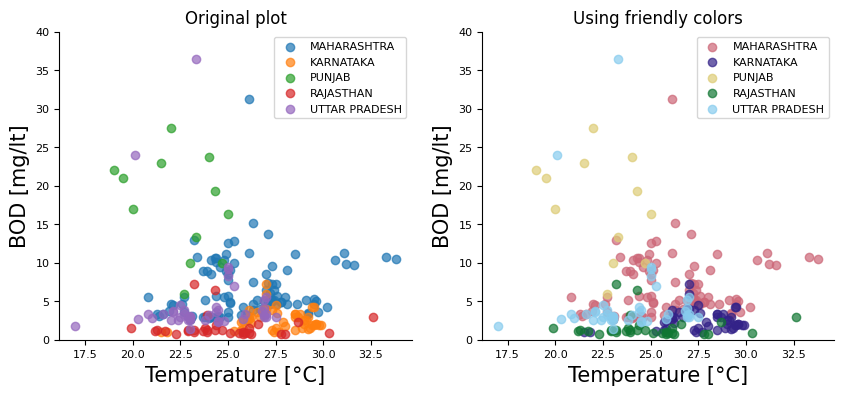

In [52]:
fig, axes = plt.subplots(1,2,figsize = (10,4))

selected_states = ['MAHARASHTRA','KARNATAKA','PUNJAB','RAJASTHAN','UTTAR PRADESH']

# random colors

for state in selected_states:
    df_state = df[df['state'] == state]
    axes[0].scatter(df_state['Temp'], df_state['BOD'], label=state, alpha=0.7)

axes[0].set_xlabel('Temperature [°C]')
axes[0].set_ylabel('BOD [mg/lt]')
axes[0].set_ylim([0,40])
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].set_title('Original plot');
axes[0].legend();


# using a colormap that's easier to distinguish for those with color vision deficiencies.
ibm_cmap_friendly = ['#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE']

for state, color in zip(selected_states,ibm_cmap_friendly):
    df_state = df[df['state'] == state]
    axes[1].scatter(df_state['Temp'], df_state['BOD'], label=state, color = color, alpha=0.7)

axes[1].set_xlabel('Temperature [°C]')
axes[1].set_ylabel('BOD [mg/lt]')
axes[1].set_ylim([0,40])
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set_title('Using friendly colors');
axes[1].legend();

In addition to color, we can use annotations or patterns to convey information so that the content remains accessible even if color distinctions are missed. For instance, some of the plots in this notebook featured both color and markers to identify different categories in a scatter plot.

### Showing extra continuous variables with *colors* (and *size*)



We saw already how `matplotlib` scatterplots can show more than just two continuous variables by using markers and a finite set of colors for categorical information (i.e., the state in which the water was sampled). We can also use a continuous range of colors to display an additional continuous variable.

Since we are adding new information, we must support the user with a suitable additional legend. In case of continuous color coding, we use a `colorbar`. We must also ensure that the data range that we want to use corresponds to the lower and upper bounds of the colormap used. We do so by specifying the `vmin` and `vmax` parameters. They ensure that data values are mapped consistently to colors, allowing for accurate visual interpretation.

In the example below, we are using a colormap to provide information of the *pH* along wioth Temperature (x axis), BOD (y axis), and state (marker). Since for the selected states, pH is between 7 and 9 usually, we use these values for `vmin` and `vmax`, respectively.

> Note: To add the colorbar in our plot, we rely on the return value of the scatter function (often named `sc` in examples), which is a `PathCollection`. This is because the colorbar function requires a "mappable" object, and the output of `scatter` fits the bill. These are more advanced topics that we do not cover here; you can find more information [online](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html).

We can use the *size* of the markers in a similar fashion as the color to show an additional continuous variable. This is done by using the parameter `s` rather than `c`. However, scaling values correctly and adding as suitable legend becomes more tricky. In the example below we only use a fixed size of 50 for all the markers.  

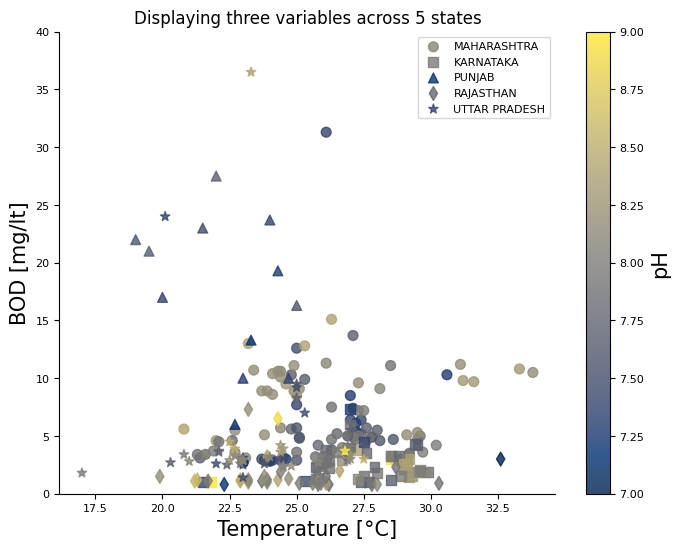

In [53]:
fig, ax = plt.subplots(1,1,figsize = (8,6))

selected_states = ['MAHARASHTRA','KARNATAKA','PUNJAB','RAJASTHAN','UTTAR PRADESH']
markers = {'MAHARASHTRA': 'o', 'KARNATAKA': 's', 'PUNJAB': '^','RAJASTHAN':'d','UTTAR PRADESH':'*'}

# using size to display pH
for state, marker in markers.items():
    df_state = df[df['state'] == state]
    sc = ax.scatter(df_state['Temp'], df_state['BOD'], marker=marker,
                    c=df_state['pH'], vmin=7, vmax=9, cmap='cividis',
                    s=50, label=state, alpha=0.8)

ax.set_xlabel('Temperature [°C]')
ax.set_ylabel('BOD [mg/lt]')
ax.set_ylim([0,40])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Displaying three variables across 5 states');

# adding legend and colorbar
ax.legend();
fig.colorbar(sc, ax=ax, label='pH');

In the example above we used the *cividis* color map, which is a perceptually uniform colormap in `matplotlib`. It was designed to be legible by those with color vision deficiencies. It provides a color progression from yellow to dark blue, ensuring consistent interpretation in both grayscale and color.

## Annotations

Text annotations can be used to highlight a few specific data points. Annotations can provide additional context or draw attention to particular points of interest. Below we use annotations to provide detailed information on one outlier. `ax.annotate()` requires only the text and the `(x,y)` coordinates of the target point. However, we can provide extra information to improve the visuals, such as the offest of the text box, text alignment, and a connecting arrow. More information is available [here](https://matplotlib.org/stable/tutorials/text/annotations.html).

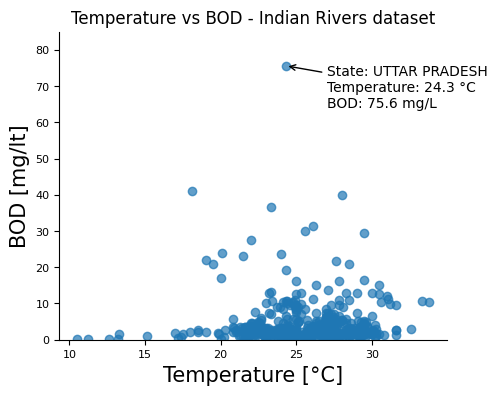

In [54]:
fig, ax = plt.subplots(1,1,figsize = (5,4))

ax.scatter(df['Temp'], df['BOD'], alpha=0.7)
ax.set_xlabel('Temperature [°C]')
ax.set_ylabel('BOD [mg/lt]')
ax.set_ylim([0,85])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Temperature vs BOD - Indian Rivers dataset');

# identify outlier
max_BOD_entry = df.loc[df['BOD'].idxmax()]

# combine fields to create annotation text
state = max_BOD_entry['state']
x = max_BOD_entry['Temp']
y = max_BOD_entry['BOD']

annotation_text = (
    f"State: {state}\n"
    f"Temperature: {x:.1f} °C\n"
    f"BOD: {y:.1f} mg/L"
)

ax.annotate(annotation_text, xy=(x,y), textcoords="offset points", xytext=(30,-30), ha='left', arrowprops=dict(arrowstyle="->"));

## Twin axes

Twin axes are particularly useful when you want to plot two data series on a single graph that have different units, ranges or scales. For instance, in *time series data*, you might want to plot the temperature and the rainfall on the same graph over time. The temperature might range from -10°C to 40°C, while the rainfall might range from 0mm to 100mm. If plotted on the same axis, the variation in one of the datasets might become visually suppressed. Using twin axes allows both datasets to be visualized clearly and in a comparable manner. Below we show how to use this techniques to visualize the variation of both pH and conductivity with respect to temperature. Notice the different scales of the two variables, linear and logarithmic.

Since we need to differentiate the two different datasets in the plot, we need to color them differently, assign labels, and then create a single legend from the two. This is easily done by simply combining the lists of *handles* (e.g., objects identifying the elements in the legend) and labels of the individual axes.

> Note: `ax.get_legend().remove()` is not needed if you are creating the scatter plots with `plt.scatter()` or `ax.scatter()`. `df.plot.scatter()` visualizes the legend by default.

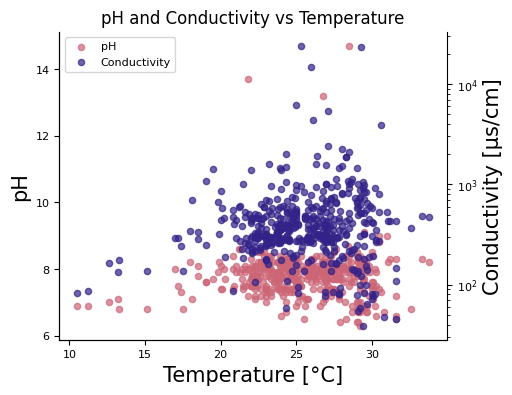

In [55]:
fig, ax1 = plt.subplots(1,1,figsize = (5,4))

# plot pH
df.plot.scatter(x='Temp', y='pH', ax = ax1, color='#CC6677', alpha=0.7, label='pH')
ax1.set_xlabel('Temperature [°C]')
ax1.set_ylabel('pH')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.get_legend().remove()  # Remove the individual legend


# create twin axis to plot conductivity
ax2 = ax1.twinx()
df.plot.scatter(x='Temp', y='Conduct', ax = ax2, color='#332288', alpha=0.7, label='Conductivity')
ax2.set_xlabel('Temperature [°C]')
ax2.set_ylabel('Conductivity [µs/cm]')
ax2.set_yscale('log')
ax2.spines['top'].set_visible(False)
ax2.get_legend().remove()  # Remove the individual legend


# Combine the legends
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left');
ax1.set_title('pH and Conductivity vs Temperature');


## Consistent scales and ranges across subplots: `sharex` and `sharey`

While twin axes allow to overlay different scales on a single plot, sometimes we want to use different subplots to show multiple aspects of our datasets. When this occurrs, often times we want to maintain the same ranges and scale across the subplots to facilitate visual comparison. We can easily do this in `matplotlib` by using the `sharex` and `sharey` parameters:

*   `sharex=True`: All subplots will share the same x-axis range and scale;
*   `sharey=True`: All subplots will share the same y-axis range and scale.

Consider the subplots below showing the variation of pH with respect to temperature for different states:

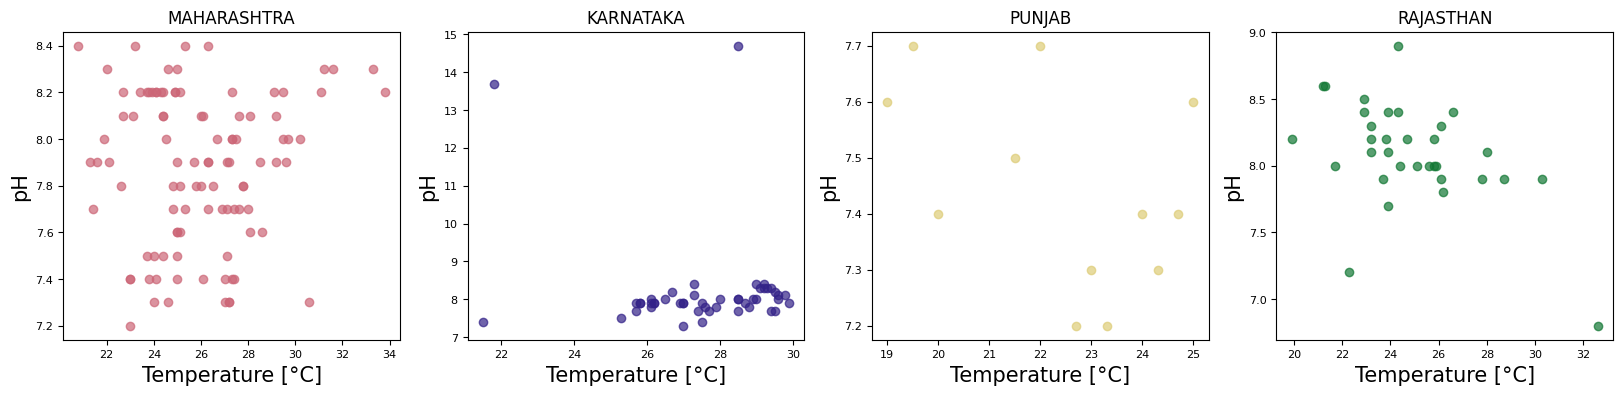

In [56]:
fig, axes = plt.subplots(1,4,figsize = (20,4))

selected_states = ['MAHARASHTRA','KARNATAKA','PUNJAB','RAJASTHAN']

ibm_cmap_friendly = ['#CC6677', '#332288', '#DDCC77', '#117733']

for state, ax, color in zip(selected_states, axes, ibm_cmap_friendly):
    df_state = df[df['state'] == state]
    ax.scatter(df_state['Temp'], df_state['pH'], label=state, alpha=0.7, color=color)
    ax.set_xlabel('Temperature [°C]')
    ax.set_ylabel('pH')
    ax.set_title(state);

Since the `y` range is set individually for each plot, it is hard to compare values across different states and identify the clear outliers for the Karnataka state. Enabling `sharey` easily improves the situation.  

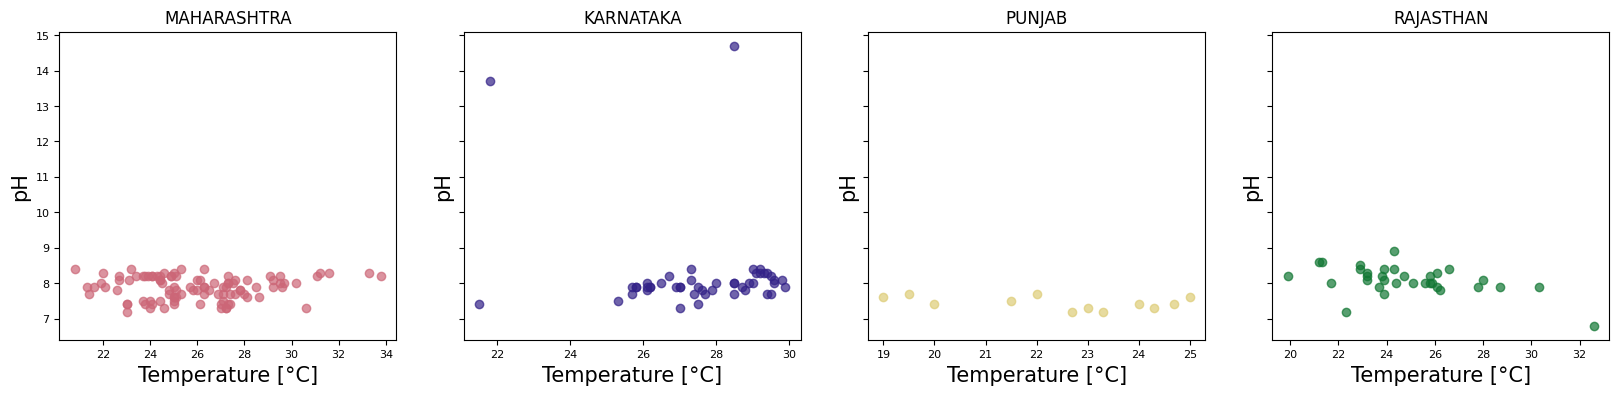

In [57]:
fig, axes = plt.subplots(1,4,figsize = (20,4), sharey=True)

selected_states = ['MAHARASHTRA','KARNATAKA','PUNJAB','RAJASTHAN']

ibm_cmap_friendly = ['#CC6677', '#332288', '#DDCC77', '#117733']

for state, ax, color in zip(selected_states, axes, ibm_cmap_friendly):
    df_state = df[df['state'] == state]
    ax.scatter(df_state['Temp'], df_state['pH'], label=state, alpha=0.7, color=color)
    ax.set_xlabel('Temperature [°C]')
    ax.set_ylabel('pH')
    ax.set_title(state);

You can expect similar benefits by using `sharex`, for instance when displaying multiple variables varying with temperature for a given location.

:::{warning}
Thinking carefeully about the limits and scale of your axes is very important, and can lead to serious misunderstandings. As you studies the two sets of figures above, do you see how different the data appears? If you quickly glanced at the first set, you might think that there is a neglibile variation in pH for Karnataka compared to the other sites, but in reality they all have quite a narrow range when views on identical scale axes with equal limits.
:::

## Consistent fonts with `rcParams`

In `matplotlib`, you can adjust the fonts and sizes for almost every part of your plot. But if you change them all individually, it can get confusing and might not look good on different screens or resolutions.

That is why we often use `plt.rcParams` (short for "runtime configuration parameters"). It helps set a consistent style for the entire plot, ensuring it looks clear and unified, no matter where it is viewed. The `plt.rcParams` settings in `matplotlib` allow you to set global plot aesthetics, ensuring that all elements of your plot adhere to a consistent style.

When it comes to fonts we have several possibilities, from changing the `font.family` (common choices are serif like Times New Roman, sans-serif like Arial, or Monospace like Consolas), to modifying the default `font.size` (e.g., used for axis labels, tick labels, titles and more, ...), and all the way to choosing individual font sizes separately.

Play around with the code below to explore different possibilities. You can find much more on customizing styles [here](https://matplotlib.org/stable/tutorials/introductory/customizing.html).


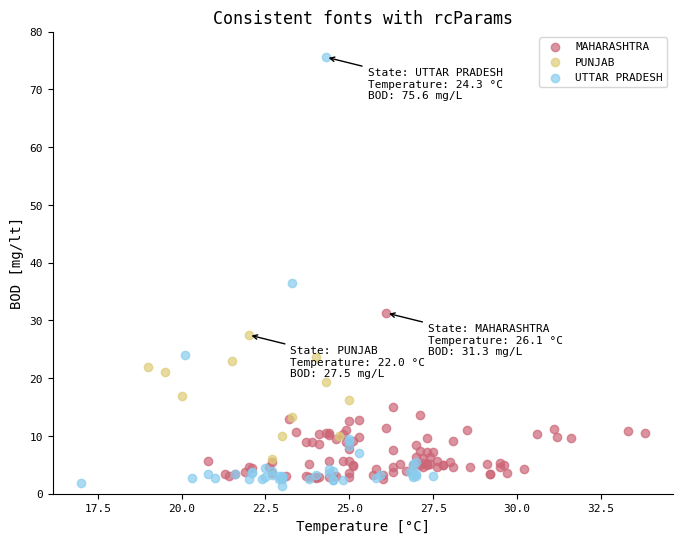

In [74]:
plt.rcParams['font.family'] = 'monospace' # serif, sans-serif
plt.rcParams['font.size'] = 8
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 8

fig, ax = plt.subplots(1,1,figsize = (8,6))


selected_states = ['MAHARASHTRA','PUNJAB','UTTAR PRADESH']

# using a colormap that's easier to distinguish for those with color vision deficiencies.
ibm_cmap_friendly = ['#CC6677','#DDCC77','#88CCEE']

for state, color in zip(selected_states,ibm_cmap_friendly):
    df_state = df[df['state'] == state]
    ax.scatter(df_state['Temp'], df_state['BOD'], label=state, color = color, alpha=0.7)

    # identify entry with maximum BOD for each state
    max_BOD_entry = df_state.loc[df_state['BOD'].idxmax()]

    # combine fields to create annotation text
    state = max_BOD_entry['state']
    x = max_BOD_entry['Temp']
    y = max_BOD_entry['BOD']

    annotation_text = (
        f"State: {state}\n"
        f"Temperature: {x:.1f} °C\n"
        f"BOD: {y:.1f} mg/L"
    )

    ax.annotate(annotation_text, xy=(x,y), textcoords="offset points", xytext=(30,-30), ha='left', arrowprops=dict(arrowstyle="->"));

ax.set_xlabel('Temperature [°C]')
ax.set_ylabel('BOD [mg/lt]')
ax.set_ylim([0,80])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Consistent fonts with rcParams');
ax.legend();


## Saving Figures and Resolution

The `savefig` function in `matplotlib` allows you to save the current figure to a file in various formats. By adjusting parameters like format, resolution (DPI), and more, you can customize the appearance and quality of the saved image.

Common formats for images are *PNG* (Portable Network Graphics) and *SVG* (Scalable Vector Graphics) files. PNG is a *raster* format, which means it saves the image as a collection of pixels. Its quality is dictated by the resolution. It is great for general purposes, as most platforms support it, but scaling up a PNG can lead to pixelation.

On the other hand, SVG is a *vector* format, which saves the image as mathematical expressions (lines, curves, shapes). It can be scaled indefinitely without loss of quality, making it perfect for technical graphics that may need resizing. However, not all platforms or software support SVG natively.

The resolution or *DPI* (dots per inch) determines the clarity and detail of saved raster image. A higher DPI value means a finer resolution, capturing more details, which is especially important when printing or when the image is to be viewed on high-resolution displays. Of course, higher DPIs require more memory to store the image. When creating a figure, the `figsize` parameter sets the dimensions of your figure in inches. The multiplication of the figsize times DPI determines the pixel dimensions of the saved image. This means that using `figsize=(8, 6)` and `dpi=100`, will yield an image with dimension of 800x600 pixels.

Try the code below and check the quality of the stored images.

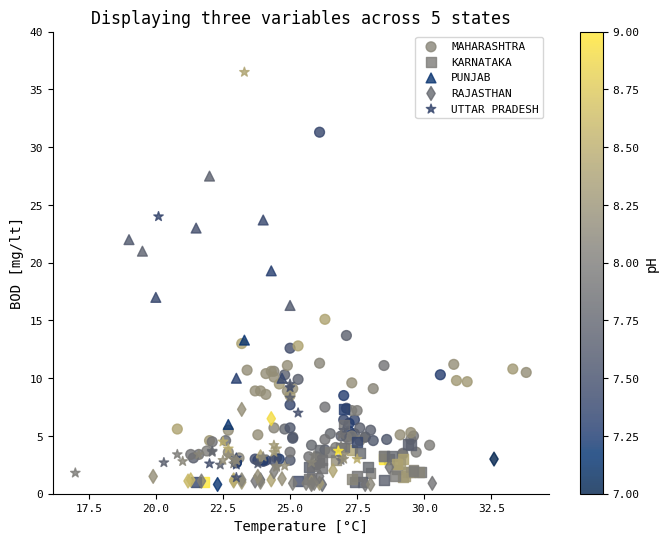

In [94]:
fig, ax = plt.subplots(1,1,figsize = (8,6))

selected_states = ['MAHARASHTRA','KARNATAKA','PUNJAB','RAJASTHAN','UTTAR PRADESH']
markers = {'MAHARASHTRA': 'o', 'KARNATAKA': 's', 'PUNJAB': '^','RAJASTHAN':'d','UTTAR PRADESH':'*'}

# using size to display pH
for state, marker in markers.items():
    df_state = df[df['state'] == state]
    sc = ax.scatter(df_state['Temp'], df_state['BOD'], marker=marker,
                    c=df_state['pH'], vmin=7, vmax=9, cmap='cividis',
                    s=50, label=state, alpha=0.8)

ax.set_xlabel('Temperature [°C]')
ax.set_ylabel('BOD [mg/lt]')
ax.set_ylim([0,40])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Displaying three variables across 5 states');

# adding legend and colorbar
ax.legend();
fig.colorbar(sc, ax=ax, label='pH');

# saving the image at different resolutions
resolutions = [72, 150, 300, 600]
for dpi in resolutions:
    image_path = f"figure_{dpi}dpi.png"
    fig.savefig(image_path, dpi=dpi)